In [1]:
##4grt11 Circuit
##All Imports Here

#Non-qiskit imports
import numpy as pi
import matplotlib.pyplot as plt
import time

#Qiskit imports
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import XGate, YGate, ZGate, HGate, CXGate, SwapGate, CCXGate, RZGate
from qiskit.compiler import transpile
from qiskit.providers.fake_provider import FakeValencia
#from qiskit.quantum_info import Operator
from qiskit.circuit.random import random_circuit


In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
cal_qc = QuantumCircuit(qreg_q, creg_c)

cal_qc.ccx(qreg_q[3], qreg_q[2], qreg_q[0])
cal_qc.ccx(qreg_q[0], qreg_q[2], qreg_q[3])
cal_qc.ccx(qreg_q[0], qreg_q[2], qreg_q[1])
cal_qc.cx(qreg_q[3], qreg_q[2])
cal_qc.x(qreg_q[3])
cal_qc.x(qreg_q[0])
backend = FakeValencia()
layers = cal_qc.depth()
compiled_cal_qc = transpile(cal_qc, backend)

# Save the circuit to a QASM file
file_path = '2_4_decoder_v3.qasm'
with open(file_path, 'w') as file:
    file.write(compiled_cal_qc.qasm())

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

n_qbits = 4
data = 1

qreg_q = QuantumRegister(n_qbits, 'q')
creg_c = ClassicalRegister(data, 'c')

in_circuits = []

for i in range(16):
    in_qc = QuantumCircuit(qreg_q, creg_c)

    # Apply X gates based on the binary representation of 'i'
    binary_rep = format(i, '04b')
    for j in range(len(binary_rep)):
        if binary_rep[j] == '1':
            in_qc.x(qreg_q[j])

    in_qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])

    in_circuits.append(in_qc)

# Printing the circuit representations
for i, in_qc in enumerate(in_circuits):
    print(f"Circuit {i+1}:")
    print(in_qc)



Circuit 1:
      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
q_3: ─░─
      ░ 
c: 1/═══
        
Circuit 2:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
     ┌───┐ ░ 
q_3: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════
             
Circuit 3:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     └───┘ ░ 
q_3: ──────░─
           ░ 
c: 1/════════
             
Circuit 4:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     ├───┤ ░ 
q_3: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════
             
Circuit 5:
           ░ 
q_0: ──────░─
     ┌───┐ ░ 
q_1: ┤ X ├─░─
     └───┘ ░ 
q_2: ──────░─
           ░ 
q_3: ──────░─
           ░ 
c: 1/════════
             
Circuit 6:
           ░ 
q_0: ──────░─
     ┌───┐ ░ 
q_1: ┤ X ├─░─
     └───┘ ░ 
q_2: ──────░─
     ┌───┐ ░ 
q_3: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════
             
Circuit 7:
           ░ 
q_0: ──────░─
     ┌───┐ ░ 
q_1: ┤ X ├─░

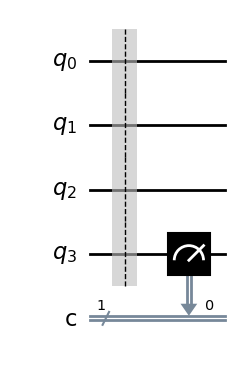

In [4]:
##Measurement/Output circuit = out_qc

out_qc = QuantumCircuit(qreg_q, creg_c)

out_qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
out_qc.measure(qreg_q[3], creg_c[0])

out_qc.draw(output='mpl')


In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler.passes import RemoveResetInZeroState, Unroller
from qiskit.transpiler import PassManager
from qiskit.circuit.library.standard_gates import IGate

# Create a new circuit to store the modified version
mod_qc = QuantumCircuit(cal_qc.num_qubits)

# Iterate through the original circuit and replace NOT gates with Identity gates
for instr, qargs, cargs in cal_qc:
    if instr.name == 'h':
        # If it's an X gate (NOT gate), replace with Identity gate
        mod_qc.append(IGate(), qargs)
    else:
        # If it's not an X gate, keep the original instruction
        mod_qc.append(instr, qargs, cargs)

print(mod_qc)


     ┌───┐          ┌───┐     
q_0: ┤ X ├──■────■──┤ X ├─────
     └─┬─┘  │  ┌─┴─┐└───┘     
q_1: ──┼────┼──┤ X ├──────────
       │    │  └─┬─┘┌───┐     
q_2: ──■────■────■──┤ X ├─────
       │  ┌─┴─┐     └─┬─┘┌───┐
q_3: ──■──┤ X ├───────■──┤ X ├
          └───┘          └───┘


In [6]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate

# Initialize an empty list to store the modified circuits
modified_circuits_before = []


# Iterate over each qubit
for qubit in qreg_q:
    # Create a new circuit for the modified version
    modified_qc_before = QuantumCircuit(qreg_q, creg_c)
    
   
    # Keep track of whether a NOT gate has been inserted before and after the current qubit
    not_before_inserted = False

    # Iterate over each gate in the original circuit
    for instruction, qargs, cargs in mod_qc:
        
        # Check if the gate involves the current qubit
        if qubit not in qargs:
            # Insert a NOT gate before the gate if not already inserted
            if not_before_inserted:
                modified_qc_before.append(instruction, qargs, cargs)  
            else:
                modified_qc_before.h(qubit)
                modified_qc_before.append(instruction, qargs, cargs)
                not_before_inserted = True                       
        else:
            not_before_inserted=False
            modified_qc_before.append(instruction, qargs, cargs)        
            
  
    modified_circuits_before.append(modified_qc_before)
            


# Initialize a list to store the modified circuits
new_circuits1 = []

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'h']
    
    # Iterate over the instructions in the circuit
    for i, (instruction, qargs, cargs) in enumerate(modified_qc_before):
        if instruction.name == 'h' and i in not_gate_indices:
            # If the NOT gate is present in cal_qc for this qubit, continue without creating a new circuit
            

            # Create a new circuit for each NOT gate
            new_qc = modified_qc_before.copy()
            # Add the corresponding NOT gate to the new circuit
            new_qc.h(qargs[0])

            # Add the remaining gates from the original circuit to the new circuit
            for j in reversed(range(len(new_qc))):
                if new_qc[j][0].name == 'h' and j != i:
                    new_qc.data.pop(j)

            new_depth_b = new_qc.depth()
            new_mod_qc = QuantumCircuit(cal_qc.num_qubits)

            # Add the modified circuits to the list
            if new_depth_b == layers:
                # Iterate through the original circuit and replace NOT gates with Identity gates
                for instr, qargs, cargs in new_qc:
                    if instr.name == 'id':
                        # If it's an X gate (NOT gate), replace with Identity gate
                        new_mod_qc.append(XGate(), qargs)
                    else:
                        # If it's not an X gate, keep the original instruction
                        new_mod_qc.append(instr, qargs, cargs)
                new_circuits1.append(new_mod_qc)

# Rest of the code remains the same


# Rest of the code remains the same

           

def remove_duplicates(circuit_list):
    # Initialize an empty set to store the unique circuits
    unique_circuits = set()
    
    # Initialize a new list to store the circuits without duplicates
    new_circuit_list = []
    
    # Iterate over each circuit in the original list
    for circuit in circuit_list:
        # Convert the circuit to a custom string representation
        circuit_str = str(circuit)
        
        # Check if the circuit string is already in the set
        if circuit_str not in unique_circuits:
            # If not, add it to the set and the new list
            unique_circuits.add(circuit_str)
            new_circuit_list.append(circuit)
    
    return new_circuit_list

# Your list of circuits (assuming it is already defined)
# circuit_list = [circuit1, circuit2, circuit3, ...]

# Call the remove_duplicates function to get the new list without duplicates
new_circuit_list = remove_duplicates(new_circuits1)        


# Display and save the modified circuits
#for i, modified_qc_before in enumerate(modified_circuits_before):
    #print(f"Modified Circuit (before) for qubit {i}:")
    #modified_qc_before.draw(output='mpl', filename=f"not_before_qubit_{i}.png")
    #print()

for i, new_qc in enumerate(new_circuit_list):
    print(f"Modified Circuit (before) for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"h_qubit_{i}.png")
    compiled_new_qc = transpile(new_qc, backend)

    file_path = f"Hadamard_2_4_decoder_v3_{i}.qasm"
    with open(file_path, 'w') as file:
        file.write(compiled_new_qc.qasm())
    print()





Modified Circuit (before) for qubit 0:

Modified Circuit (before) for qubit 1:

Modified Circuit (before) for qubit 2:

Modified Circuit (before) for qubit 3:

Modified Circuit (before) for qubit 4:



In [8]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate

# Initialize an empty list to store the modified circuits
modified_circuits_before = []


# Iterate over each qubit
for qubit in qreg_q:
    # Create a new circuit for the modified version
    modified_qc_before = QuantumCircuit(qreg_q, creg_c)
    
   
    # Keep track of whether a NOT gate has been inserted before and after the current qubit
    not_before_inserted = False

    # Iterate over each gate in the original circuit
    for instruction, qargs, cargs in mod_qc:
        
        # Check if the gate involves the current qubit
        if qubit not in qargs:
            # Insert a NOT gate before the gate if not already inserted
            if not_before_inserted:
                modified_qc_before.append(instruction, qargs, cargs)  
            else:
                modified_qc_before.x(qubit)
                modified_qc_before.append(instruction, qargs, cargs)
                not_before_inserted = True                       
        else:
            not_before_inserted=False
            modified_qc_before.append(instruction, qargs, cargs)        
            
    #new_depth_b =  modified_qc_before.depth()
    # Add the modified circuits to the list
    #if new_depth_b == layers:
        modified_circuits_before.append(modified_qc_before)
            
# Define a helper function to check if a qubit already has a NOT gate in a circuit
def has_not_gate(circuit, qubit):
    for gate, qargs, _ in circuit.data:
        if gate.name == 'x' and qargs[0] == qubit:
            return True
    return False

# Initialize a list to store the modified circuits
new_circuits1 = []

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'x']
    
    # Iterate over the instructions in the circuit
    for i, (instruction, qargs, cargs) in enumerate(modified_qc_before):
        if instruction.name == 'x' and i in not_gate_indices:
            # If the NOT gate is present in cal_qc for this qubit, continue without creating a new circuit
            if has_not_gate(cal_qc, qargs[0]):
                continue

            # Create a new circuit for each NOT gate
            new_qc = modified_qc_before.copy()
            # Add the corresponding NOT gate to the new circuit
            new_qc.x(qargs[0])

            # Add the remaining gates from the original circuit to the new circuit
            for j in reversed(range(len(new_qc))):
                if new_qc[j][0].name == 'x' and j != i and not has_not_gate(cal_qc, new_qc[j][1][0]):
                    new_qc.data.pop(j)

            new_depth_b = new_qc.depth()
            # Add the modified circuits to the list
            if new_depth_b == layers:
                new_circuits1.append(new_qc)

# Rest of the code remains the same


# Rest of the code remains the same

           

def remove_duplicates(circuit_list):
    # Initialize an empty set to store the unique circuits
    unique_circuits = set()
    
    # Initialize a new list to store the circuits without duplicates
    new_circuit_list = []
    
    # Iterate over each circuit in the original list
    for circuit in circuit_list:
        # Convert the circuit to a custom string representation
        circuit_str = str(circuit)
        
        # Check if the circuit string is already in the set
        if circuit_str not in unique_circuits:
            # If not, add it to the set and the new list
            unique_circuits.add(circuit_str)
            new_circuit_list.append(circuit)
    
    return new_circuit_list

# Your list of circuits (assuming it is already defined)
# circuit_list = [circuit1, circuit2, circuit3, ...]

# Call the remove_duplicates function to get the new list without duplicates
new_circuit_list = remove_duplicates(new_circuits1)        


# Display and save the modified circuits
#for i, modified_qc_before in enumerate(modified_circuits_before):
    #print(f"Modified Circuit (before) for qubit {i}:")
    #modified_qc_before.draw(output='mpl', filename=f"not_before_qubit_{i}.png")
    #print()

for i, new_qc in enumerate(new_circuit_list):
    print(f"Modified Circuit (before) for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"not_qubit_{i}.png")
    #depthfinal = new_qc.depth()
    #print(depthfinal)
    print()





Modified Circuit (before) for qubit 0:

Modified Circuit (before) for qubit 1:

Modified Circuit (before) for qubit 2:

Modified Circuit (before) for qubit 3:



In [ ]:
from itertools import combinations
new_circuits2 = []         

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'x']

    # Iterate over the instructions in the circuit
    for combination in combinations(not_gate_indices, 2):
        new_qc = modified_qc_before.copy()                             
            
        # Add the remaining gates from the original circuit to the new circuit
        for j in reversed(range(len(new_qc))):
            if j not in combination and new_qc[j][0].name == 'x':
                new_qc.data.pop(j)
        
        # Add the modified circuit to the list
        new_circuits2.append(new_qc)


for i, new_qc in enumerate(new_circuits2):
    print(f"Modified Circuit (before) for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"not_{i}.png")
    print()

In [ ]:
from qiskit import QuantumCircuit





# Generate circuits with an extra NOT gate from each circuit in modified_circuits_before
modified_cal_circuits = []
for modified_qc_before in modified_circuits_before:
    # Create a new circuit by combining modified_circuit with cal_qc
    modified_cal_circuit = cal_qc.copy()
    
    # Add the extra NOT gate from modified_circuit to modified_cal_circuit
    for instruction, qargs, cargs in modified_qc_before:
        if instruction.name == 'x':
            modified_cal_circuit.x(qargs[0])
    
    # Add the modified_cal_circuit to the list
    modified_cal_circuits.append(modified_cal_circuit)



for i, modified_cal_circuit in enumerate(modified_cal_circuits):
    print(f"Modified Circuit new for qubit {i}:")
    modified_cal_circuit.draw(output='mpl', filename=f"new_{i}.png")
    print()


Modified Circuit new for qubit 0:

Modified Circuit new for qubit 1:

Modified Circuit new for qubit 2:

Modified Circuit new for qubit 3:

Modified Circuit new for qubit 4:



In [ ]:

cal_out_qc = cal_qc.compose(out_qc, front=False, inplace=False)
cal_out_qc.draw(output='mpl')
## in_qc + cal_out_qc= org_qc
for i, in_qc in enumerate(in_circuits):
    print(f"Input:{i}")
    org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
    org_qc.draw(output='mpl')
    # Run the circuit and get results
    shots = 1000    
    backend = FakeValencia()
    qc = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
    results = backend.run(qc,shots=shots).result()
    
    # Extract the counts from the results
    count = results.get_counts(qc)

    #sort the counts

    count = dict(sorted(count.items()))

    print(count)
    print(count[1])

    #draw a histogram

    

Input:0
{'0000': 916, '0001': 84}


KeyError: 1

In [ ]:
for i, new_qc in enumerate(new_circuits1):
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        shots = [i for i in range(1000, 1501, 100)]
        for i in shots:
            print(f"Shots: {i}:")    
            backend = FakeValencia()
            qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
            results = backend.run(qc_noisy,shots=i).result()
            
            # Extract the counts from the results
            count_noisy = results.get_counts(qc_noisy)

            #sort the counts

            count_noisy = dict(sorted(count_noisy.items()))

            print(count_noisy)

            #draw a histogram

            

Infected circuit 0
Input:0
Shots: 1000:
{'0': 899, '1': 101}
Shots: 1100:
{'0': 991, '1': 109}
Shots: 1200:
{'0': 1074, '1': 126}
Shots: 1300:
{'0': 1174, '1': 126}
Shots: 1400:
{'0': 1236, '1': 164}
Shots: 1500:
{'0': 1336, '1': 164}
Input:1
Shots: 1000:
{'0': 897, '1': 103}
Shots: 1100:
{'0': 964, '1': 136}
Shots: 1200:
{'0': 1062, '1': 138}
Shots: 1300:
{'0': 1129, '1': 171}
Shots: 1400:
{'0': 1255, '1': 145}
Shots: 1500:
{'0': 1334, '1': 166}
Input:2
Shots: 1000:
{'0': 898, '1': 102}
Shots: 1100:
{'0': 958, '1': 142}
Shots: 1200:
{'0': 1066, '1': 134}
Shots: 1300:
{'0': 1172, '1': 128}
Shots: 1400:
{'0': 1230, '1': 170}
Shots: 1500:
{'0': 1328, '1': 172}
Input:3
Shots: 1000:
{'0': 876, '1': 124}
Shots: 1100:
{'0': 969, '1': 131}
Shots: 1200:
{'0': 1046, '1': 154}
Shots: 1300:
{'0': 1153, '1': 147}
Shots: 1400:
{'0': 1225, '1': 175}
Shots: 1500:
{'0': 1321, '1': 179}
Input:4
Shots: 1000:
{'0': 896, '1': 104}
Shots: 1100:
{'0': 970, '1': 130}
Shots: 1200:
{'0': 1082, '1': 118}
Shots:

In [8]:
for i, new_mod_qc in enumerate(new_circuit_list):
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_mod_qc.draw(output='mpl')
    cal_out_qc = new_mod_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = [i for i in range(1000, 1501, 100)]
        #for i in shots:
        #print(f"Shots: {i}:")   

        cal_clean_qc = cal_qc.compose(out_qc, front=False, inplace=False)
        #cal_clean_qc.draw(output='mpl')
        org_c_qc = cal_clean_qc.compose(in_qc, front=True, inplace=False)
        #org_c_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = 1000    
        backend = FakeValencia()
        qc = transpile(org_c_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc,shots=1000).result()
        
        # Extract the counts from the results
        count = results.get_counts(qc)

        #sort the counts

        count = dict(sorted(count.items()))

        print(count) 
        
        backend = FakeValencia()
        qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc_noisy,shots=1000).result()
        
        # Extract the counts from the results
        count_noisy = results.get_counts(qc_noisy)

        #sort the counts

        count_noisy = dict(sorted(count_noisy.items()))

        print(count_noisy)
        #if i == 1000:
        

        if ((count_noisy['1']/1000 > 0.5) and (count['1']/1000 > 0.5)):
            diff = count_noisy['1']-count['1']
            print(f"diff={diff}")
            #draw a histogram
        
        if ((count_noisy['0']/1000 > 0.5) and (count['0']/1000 > 0.5)):
            diff = count_noisy['0']-count['0']
            print(f"diff={diff}")  

        if diff < 0:
            shots = [i for i in range(1100, 1501, 100)]
            for i in shots:
                print(f"Shots: {i}:")  
                qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
                results = backend.run(qc_noisy,shots=1000).result()
                
                # Extract the counts from the results
                count_noisy = results.get_counts(qc_noisy)

                #sort the counts

                count_noisy = dict(sorted(count_noisy.items()))

                print(count_noisy)
        

Infected circuit 0
Input:0
{'0': 668, '1': 332}
{'0': 644, '1': 356}
diff=-24
Shots: 1100:
{'0': 653, '1': 347}
Shots: 1200:
{'0': 661, '1': 339}
Shots: 1300:
{'0': 633, '1': 367}
Shots: 1400:
{'0': 628, '1': 372}
Shots: 1500:
{'0': 654, '1': 346}
Input:1
{'0': 624, '1': 376}
{'0': 426, '1': 574}
Shots: 1100:
{'0': 434, '1': 566}
Shots: 1200:
{'0': 385, '1': 615}
Shots: 1300:
{'0': 410, '1': 590}
Shots: 1400:
{'0': 420, '1': 580}
Shots: 1500:
{'0': 443, '1': 557}
Input:2
{'0': 648, '1': 352}
{'0': 662, '1': 338}
diff=14
Input:3
{'0': 613, '1': 387}
{'0': 397, '1': 603}
Input:4
{'0': 643, '1': 357}
{'0': 655, '1': 345}
diff=12
Input:5
{'0': 424, '1': 576}
{'0': 611, '1': 389}
Input:6
{'0': 481, '1': 519}
{'0': 662, '1': 338}
Input:7
{'0': 401, '1': 599}
{'0': 574, '1': 426}
Input:8
{'0': 443, '1': 557}
{'0': 647, '1': 353}
Input:9
{'0': 373, '1': 627}
{'0': 399, '1': 601}
diff=-26
Shots: 1100:
{'0': 396, '1': 604}
Shots: 1200:
{'0': 374, '1': 626}
Shots: 1300:
{'0': 390, '1': 610}
Shots